In [1]:
# Distribuciones de probabilidad discretas.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from scipy import stats

Text(0.5, 1.0, 'Probabilidad de suma de dos dados')

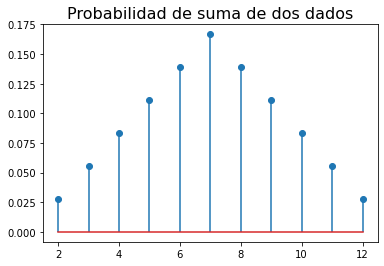

In [2]:
# Graficar distribución discreta.

x = np.arange(2, 13)

y = np.array([1, 2, 3, 4, 5,
    6, 5, 4, 3, 2, 1]) / 36

plt.stem(x, y)

plt.title("Probabilidad de suma de dos dados",
    fontsize = 16)

In [3]:
# Cálculo de valor esperado y varianza.

df = pd.DataFrame({"X": x, "P": y})

df.set_index("X", inplace = True)

df["XP(X)"] = df.index * df["P"]
df["X^2"] = df.index * df.index
df["X^2P(X)"] = df["X^2"]* df["P"]

print("E(X) = " + f"{df['XP(X)'].sum():.2f}")
print("Var(X) = " +
    f"{df['X^2P(X)'].sum() - df['XP(X)'].sum() ** 2:.2f}")

df

E(X) = 7.00
Var(X) = 5.83


,P,XP(X),X^2,X^2P(X)
X,,,,
2,0.027778,0.055556,4,0.111111
3,0.055556,0.166667,9,0.500000
4,0.083333,0.333333,16,1.333333
5,0.111111,0.555556,25,2.777778
6,0.138889,0.833333,36,5.000000
7,0.166667,1.166667,49,8.166667
8,0.138889,1.111111,64,8.888889
9,0.111111,1.000000,81,9.000000
10,0.083333,0.833333,100,8.333333


E(X) = 1.50
Var(X) = 0.75


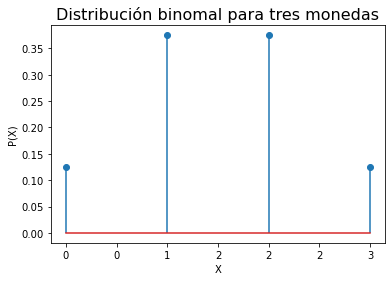

In [4]:
# Distribución binomial para tres monedas.

n, p = 3, 0.5

fig, ax = plt.subplots(1, 1)

x = np.arange(0, n + 1)

y = stats.binom.pmf(x, n, p)

ax.stem(x, y)

ax.set_title( "Distribución binomal para tres monedas",
    fontsize = 16)
ax.set_xlabel("X")
ax.set_ylabel("P(X)")
ax.xaxis.set_major_formatter("{x:.0f}")

m, v = stats.binom.stats(n, p)

print("E(X) = " + f"{m:.2f}")
print("Var(X) = " + f"{v:.2f}")

In [5]:
# Cálculo de valor esperado y varianza.

df = pd.DataFrame({"X": x, "P": y})

df.set_index("X", inplace = True)

df["XP(X)"] = df.index * df["P"]
df["X^2"] = df.index * df.index
df["X^2P(X)"] = df["X^2"]* df["P"]

print("E(X) = " + f"{df['XP(X)'].sum():.2f}")
print("Var(X) = " +
    f"{df['X^2P(X)'].sum() - df['XP(X)'].sum() ** 2:.2f}")

df

E(X) = 1.50
Var(X) = 0.75


,P,XP(X),X^2,X^2P(X)
X,,,,
0,0.125,0.000,0,0.000
1,0.375,0.375,1,0.375
2,0.375,0.750,4,1.500
3,0.125,0.375,9,1.125


Probabilidad de que el lago Cayuga se congele 1 vez en 230 años: 0.000


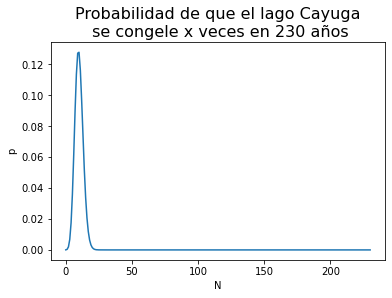

In [6]:
# Ejericio congelación de lago Cayuga.

N = 230
e = 10

n, p = N, e / N 

fig, ax = plt.subplots(1, 1)

x = np.arange(0, n + 1)

ax.plot(x, stats.binom.pmf(x, n, p))

ax.set_title( "Probabilidad de que el lago Cayuga\n"
    + " se congele x veces en " + str(n) + " años",
    fontsize = 16 )
ax.set_xlabel("N")
ax.set_ylabel("p")

print("Probabilidad de que el lago Cayuga"
    + " se congele 1 vez en " + str(n) + " años: "
    + f"{stats.binom.pmf(1, n, p):.3f}")

Probabilidad de que el lago Cayuga se congele 1 vez en 10 años: 0.291
Probabilidad de que el lago Cayuga se congele al menos 1 vez en 10 años: 0.359


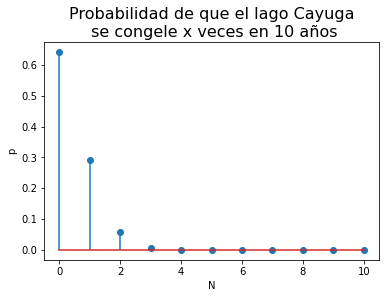

In [7]:
# Ejericio congelación de lago Cayuga.

N = 230
e = 10

n, p = e, e / N 

fig, ax = plt.subplots(1, 1)

x = np.arange(0, n + 1)

ax.stem(x, stats.binom.pmf(x, n, p))

ax.set_title( "Probabilidad de que el lago Cayuga\n"
    + " se congele x veces en " + str(n) + " años",
    fontsize = 16 )
ax.set_xlabel("N")
ax.set_ylabel("p")

print("Probabilidad de que el lago Cayuga"
    + " se congele 1 vez en " + str(n) + " años: "
    + f"{stats.binom.pmf(1, n, p):.3f}")

    
print( "Probabilidad de que el lago Cayuga"
    + " se congele al menos 1 vez en " + str(n)
    + " años: " + f"{1 - stats.binom.cdf(0, n, p):.3f}" )

(0.0, 0.21000000000000002)

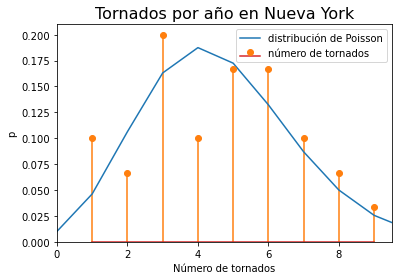

In [8]:
# Ejercicio tornados en NY.

path = "../datos/"
fname = "tornados_NY.csv"

df = pd.read_csv(path + fname, index_col = "Año")

mu = df.mean()

n, bins = np.histogram( df,
    bins = np.arange(0.5, 10.5), 
    density = 1 )

fig, ax = plt.subplots(1, 1)

x = np.arange(0, 11)

ax.plot(x, stats.poisson.pmf(x, mu))

ax.stem(np.arange(1, 10), n,
    linefmt = "C1-",
    markerfmt = "C1o")

ax.set_title("Tornados por año en Nueva York",
    fontsize = 16)
ax.set_xlabel("Número de tornados")
ax.set_ylabel("p")
ax.xaxis.set_major_formatter("{x:.0f}")
ax.legend( ["distribución de Poisson",
    "número de tornados"] )
ax.set_xlim(0, 9.5)
ax.set_ylim(0)

(0.0, 20.0)

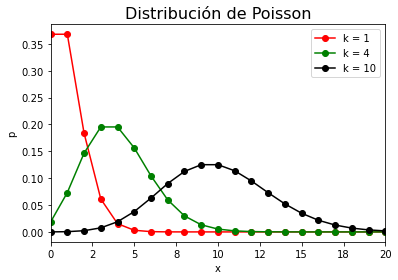

In [9]:
# Diferentes casos de la distribución de Poisson.

mu = [1, 4, 10]
color = ["red", "green", "black"]

fig, ax = plt.subplots(1, 1)

x = np.arange(0, 21)

for i in range(len(mu)):
    ax.plot(x, stats.poisson.pmf(x, mu[i]),
        marker = "o", color = color[i])

ax.set_title("Distribución de Poisson",
    fontsize = 16)
ax.set_xlabel("x")
ax.set_ylabel("p")
ax.xaxis.set_major_formatter("{x:.0f}")
ax.legend( ["k = " + str(x) for x in mu] )
ax.set_xlim(0, 20)